In [1]:
from datetime import date, datetime
import calendar
import numpy as np
import pandas as pd
import calendar
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_theme()

In [2]:
bnf = pd.read_csv(r'C:\Users\91773\Downloads\3131.csv')
bnf['datetime'] = pd.to_datetime(bnf['datetime'])
bnf['year'] = pd.DatetimeIndex(bnf['datetime']).year
bnf['month'] = pd.DatetimeIndex(bnf['datetime']).month
bnf['month_name'] = bnf['datetime'].dt.month_name().str[:3]
bnf['dayOfWeek'] = bnf['datetime'].dt.day_name()

In [3]:
bnf.head()

,datetime,open,high,low,close,volume,year,month,month_name,dayOfWeek
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006,1,Jan,Monday
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006,1,Jan,Tuesday
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006,1,Jan,Wednesday
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1,Jan,Thursday
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006,1,Jan,Friday


In [4]:
fri=-1
mon=-1
tue=-1 
wed=-1
cnt = 0
expiry = bnf.loc[bnf['dayOfWeek']=='Thursday']

for ind in bnf.index: 
    cnt = cnt + 1
    if(bnf['dayOfWeek'][ind] == 'Friday'):
        fri =0
        a= bnf.loc[ind]
    elif(bnf['dayOfWeek'][ind] == 'Monday'): 
        mon =0
        b = bnf.loc[ind]
    elif(bnf['dayOfWeek'][ind] == 'Tuesday'):
        tue =0
        c= bnf.loc[ind]
    elif(bnf['dayOfWeek'][ind] == 'Wednesday'): 
        wed =0
        d = bnf.loc[ind]
    
    
    if(cnt <= 5 and (bnf['dayOfWeek'][ind] == 'Thursday')):
        cnt = 0
        tue = mon = wed = fri = -1
    elif(cnt == 5): 
        if (wed != -1): 
             expiry = expiry.append(d) 
        elif(tue != -1): 
            expiry = expiry.append(c)
        elif(mon != -1): 
            expiry = expiry.append(b)
        elif(fri != -1): 
            expiry = expiry.append(a)
        tue = wed = mon= fri = -1
        cnt = 0
# expiry is dataframe with all expiry days        
expiry = expiry.sort_values(by=['datetime'])
expiry

,datetime,open,high,low,close,volume,year,month,month_name,dayOfWeek
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1,Jan,Thursday
7,2006-01-12,4629.64,4659.00,4592.00,4635.35,0.0,2006,1,Jan,Thursday
12,2006-01-19,4447.64,4513.60,4447.64,4489.00,0.0,2006,1,Jan,Thursday
16,2006-01-25,4493.20,4577.05,4477.30,4494.95,0.0,2006,1,Jan,Wednesday
21,2006-02-02,4542.14,4542.14,4426.85,4441.05,0.0,2006,2,Feb,Thursday
...,...,...,...,...,...,...,...,...,...,...
3424,2019-11-21,31413.25,31463.15,31243.00,31349.95,0.0,2019,11,Nov,Thursday
3429,2019-11-28,31981.70,32157.05,31905.90,32122.95,0.0,2019,11,Nov,Thursday
3434,2019-12-05,32083.80,32126.95,31628.30,31712.95,0.0,2019,12,Dec,Thursday
3439,2019-12-12,31356.80,31711.45,31352.10,31665.45,0.0,2019,12,Dec,Thursday


In [57]:
group = bnf.groupby(['year','month'])
bnf['daily-return'] = group['close'].pct_change()

In [58]:
bnf['ret']= bnf['daily-return'] + 1 

In [59]:
bnf['monthly-return'] = 100*(group['ret']. transform(np.product)-1)
bnf.head()

,datetime,open,high,low,close,volume,year,month,month_name,dayOfWeek,daily-return,ret,monthly-return
0,2006-01-02,4566.95,4601.35,4542.00,4556.25,0.0,2006,1,Jan,Monday,NaN,NaN,1.346502
1,2006-01-03,4531.45,4605.45,4531.45,4600.25,0.0,2006,1,Jan,Tuesday,0.009657,1.009657,1.346502
2,2006-01-04,4619.55,4707.60,4616.05,4694.14,0.0,2006,1,Jan,Wednesday,0.020410,1.020410,1.346502
3,2006-01-05,4714.20,4782.64,4670.55,4760.45,0.0,2006,1,Jan,Thursday,0.014126,1.014126,1.346502
4,2006-01-06,4767.25,4802.80,4703.10,4755.60,0.0,2006,1,Jan,Friday,-0.001019,0.998981,1.346502


In [60]:
monthlyRet = pd.DataFrame(group['monthly-return'].apply(lambda row : row.iloc[0]).reset_index())
monthlyRet

,year,month,monthly-return
0,2006,1,1.346502
1,2006,2,2.124314
2,2006,3,1.941960
3,2006,4,-3.688572
4,2006,5,-12.808449
...,...,...,...
163,2019,8,-3.311565
164,2019,9,8.496075
165,2019,10,4.667456
166,2019,11,5.326478


In [61]:
monthlyRet= monthlyRet [['year','month','monthly-return']]
monthlyRet = monthlyRet.pivot(index='year',columns='month',values='monthly-return')
monthlyRet

month,1,2,3,4,5,6,7,8,9,10,11,12
year,,,,,,,,,,,,
2006,1.346502,2.124314,1.941960,-3.688572,-12.808449,-8.995215,9.667272,13.432080,13.447004,6.150164,10.218452,-5.086285
2007,-1.417324,-14.306973,-1.492870,13.334839,11.084765,5.235136,3.132629,0.580051,18.720706,12.840689,1.925837,4.957787
2008,-6.854951,-6.847724,-17.302997,15.449221,-16.356280,-20.798311,21.069757,2.350761,-5.307684,-24.416622,-11.989253,21.270276
2009,-12.899317,-8.157824,11.156830,21.833335,34.737148,-0.342203,1.233127,-2.855518,19.453858,-4.767386,9.587606,-2.393808
2010,-5.056983,0.849785,6.024366,3.813731,-4.212572,3.789434,8.680771,3.216155,13.663917,-1.799829,-6.142961,-4.218265
2011,-10.238914,-0.437450,7.533485,-0.924859,-1.982871,1.914641,-3.210573,-12.849438,-1.180001,8.749823,-12.809183,-10.417198
2012,24.069893,4.674795,-0.740118,-0.277138,-8.398502,11.578510,-0.269876,-4.120961,14.993476,-1.327881,7.457766,3.059758
2013,0.430294,-8.875756,-1.544187,9.942629,-1.843438,-6.328364,-14.504178,-10.783352,5.233218,16.086344,-4.082159,0.894159
2014,-10.081594,6.559032,19.621759,2.123764,15.195452,-0.296652,-0.350818,4.049498,-3.875337,11.287721,8.048633,1.140872


In [62]:
monthlyRet.columns = ['Jan','Feb', 'Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
monthlyRet

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
2006,1.346502,2.124314,1.941960,-3.688572,-12.808449,-8.995215,9.667272,13.432080,13.447004,6.150164,10.218452,-5.086285
2007,-1.417324,-14.306973,-1.492870,13.334839,11.084765,5.235136,3.132629,0.580051,18.720706,12.840689,1.925837,4.957787
2008,-6.854951,-6.847724,-17.302997,15.449221,-16.356280,-20.798311,21.069757,2.350761,-5.307684,-24.416622,-11.989253,21.270276
2009,-12.899317,-8.157824,11.156830,21.833335,34.737148,-0.342203,1.233127,-2.855518,19.453858,-4.767386,9.587606,-2.393808
2010,-5.056983,0.849785,6.024366,3.813731,-4.212572,3.789434,8.680771,3.216155,13.663917,-1.799829,-6.142961,-4.218265
2011,-10.238914,-0.437450,7.533485,-0.924859,-1.982871,1.914641,-3.210573,-12.849438,-1.180001,8.749823,-12.809183,-10.417198
2012,24.069893,4.674795,-0.740118,-0.277138,-8.398502,11.578510,-0.269876,-4.120961,14.993476,-1.327881,7.457766,3.059758
2013,0.430294,-8.875756,-1.544187,9.942629,-1.843438,-6.328364,-14.504178,-10.783352,5.233218,16.086344,-4.082159,0.894159
2014,-10.081594,6.559032,19.621759,2.123764,15.195452,-0.296652,-0.350818,4.049498,-3.875337,11.287721,8.048633,1.140872


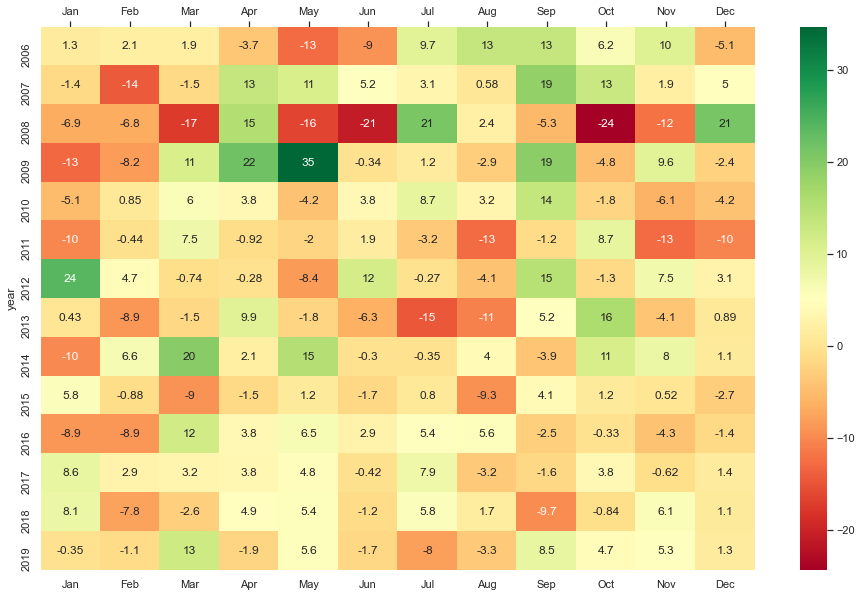

In [63]:
plt.figure(figsize=(16, 10))
ax = sns.heatmap(monthlyRet, cmap='RdYlGn', annot=True)
ax.tick_params(top=True, labeltop=True)